<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Iowa Liquor Sales 

---

Project 3, unlike project 2 which combined skills from weeks 1 and 2, will now be review of week 2. Projects going forward will fit this format: you learn material one week and review it through a project the following week.

That being said, this is as you might expect more challenging. You will be using the pandas data transformation functionality (melt, pivot, groupby, apply) that was not a factor in Project 2.

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [45]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [46]:
#iowa_file = '/Users/kiefer/github-repos/DSI-SF-2/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'
iowa_file = '/Users/paulmartin/Desktop/DSI-SF-2-GitPaulM/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'
iowa = pd.read_csv(iowa_file)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [47]:
#Let's get some initial info on the data:  Shape, info, describe,head as a start.  Check out column names
print "Iowa Liquors Data Frame Shape: ", iowa.shape
print "Visual scan of a few records: "  
print iowa.info(),
print '\n'
print iowa.describe().T
iowa.head(10)


Iowa Liquors Data Frame Shape:  (270955, 18)
Visual scan of a few records: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.00,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.50,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.00,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.50,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.00,5.55
5,04/20/2015,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,$13.32,$19.98,6,$119.88,10.50,2.77
6,08/05/2015,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,$6.66,$9.99,3,$29.97,2.25,0.59
7,06/25/2015,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,$15.75,$23.63,2,$47.26,3.50,0.92
8,01/04/2016,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,4,$68.96,3.00,0.79
9,11/10/2015,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,$7.62,$11.43,2,$22.86,2.00,0.53


In [48]:
iowa.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [49]:
#Initial items to fix (object but should be float for calculations): Cost,Retail,Sale (fron initial items mehod)

iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [50]:
# Function library


def stripit(input):
    if (type(input) == int) or (type(input) == float) :
        return float(input)
    else:
        try:
            input= float(input[1:].replace('.',''))/100.0
        except:
            input = np.nan
    return input

def bigliq(input):
    try:
        if 'WHISK' in input:
            return 'WHISKIES'
        if 'SCOTCH' in input:
            return 'SCOTCHES'
        if 'TEQU' in input:
            return 'TEQUILAS'
        if 'BOUR' in input:
            return 'BOURBONS'
        if 'LEMONA' in input:
            return 'LEMONADES'
        if 'LIQUE' in input:
            return 'LIQUERS'
        if 'BRAND' in input:
            return 'BRANDIES'
        if 'VODKA' in input:
            return 'VODKAS'
        if 'RUM' in input:
            return 'RUMS'
        if 'GIN' in input:
            return 'GINS'
        if 'COCK' in input:
            return 'COCKTAILS'
        if 'SCHNA' in input:
            return 'SCHNAPSES'
        if 'CREME' in input:
            return 'CREMES'
        if 'SPECIALTY' in input:
            return 'SPECIALTIES'
        if 'TRIPLE' in input:
            return 'TRIPLE SECS'
        if 'AMARET' in input:
            return 'AMARETTOS'
        if 'AMERICAN' in input:
            return 'GRAIN ALCOHOLS'
        else:
            return 'MISC.'
    except:
        input = "MISSING DATA"
    return input

def yearint(input):
    input = input[-4:]
    try:
        input= int(float(input))
    except:
        input = np.nan
    return input

def qtr(input):
    input = input[0:2]
    try:
        if int(float(input)) <=3:
            input = 'Q1'
        elif int(float(input)) <=6:
            input = 'Q2'
        elif int(float(input)) <=9:
            input = 'Q3'       
        elif int(float(input)) <=12:
            input = 'Q4'
        else:
            input = np.nan
    except:
        input = np.nan
    return input

# Alternative mapping and better programmimg  will implement time permitting
def bigliq2(input):
    
    category_map = {
        ["WHISK", "SCOTCH"]:   "WHISKIES",
        ["TEQU"]:              "TEQUILAS",
        ["CREME"]:             "SODAS"
    }
    
    for search, category in category_map.items():
        
        if input in search:
            return category
    
    return "UNKNOWN"

def quarterint(val):
    v = val.month   
    if v >= 1 and v <= 3:
         return 1
    elif v >= 4 and val.month <= 6:
         return 2
    elif v >= 7 and val.month <= 9:
         return 3
    elif v >= 10 and val.month <= 12:
         return 4
    return np.nan

In [51]:
#aliases
c  = 'State Bottle Cost'
r  = 'State Bottle Retail'
s  = 'Sale (Dollars)'
b  = 'Bottles Sold'
c1 = 'County'
c2 = 'Category'
c3 = 'Category Name'
v  = 'Vendor Number'

### 3.2 Clean the columns

In [52]:
#Initial Cleanup
#Clean up the dollar strings
#Convert date to timestamp

iowa[[c,r,s]]=iowa[[c,r,s]].applymap(stripit)
iowa['Date'] = pd.to_datetime(iowa['Date'])


In [53]:
# #Confirm

iowa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail      270955 non-null float64
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null float64
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: datetim

In [54]:
# Let's add some populated columns we will likely need for later calcultions
iowa['Year'] = iowa['Date'].map(lambda val: val.year)
iowa['Quarter'] = iowa['Date'].apply(quarterint)
iowa['Liquor Category'] = iowa['Category Name'].apply(bigliq)


In [55]:
#iowa.loc[(iowa['Liquor Category']=='MISC.')]
iowa['Liquor Category'].value_counts()

WHISKIES          81867
VODKAS            69945
RUMS              32753
LIQUERS           17891
BRANDIES          15044
SCHNAPSES         13667
TEQUILAS          12109
GINS               9917
COCKTAILS          6929
SCOTCHES           3185
SPECIALTIES        2539
AMARETTOS          1625
TRIPLE SECS        1236
CREMES              730
MISSING DATA        632
GRAIN ALCOHOLS      575
BOURBONS            190
MISC.               121
Name: Liquor Category, dtype: int64

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

In [56]:
iowa.describe().T

,count,mean,std,min,25%,50%,75%,max
Store Number,270955.0,3.590264e+03,947.662050,2106.00,2604.00,3722.00,4378.00,9023.00
County Number,269878.0,5.723164e+01,27.341205,1.00,NaN,NaN,NaN,99.00
Category,270887.0,1.043888e+06,50182.111075,1011100.00,NaN,NaN,NaN,1701100.00
Vendor Number,270955.0,2.564344e+02,141.014890,10.00,115.00,260.00,380.00,978.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.00,38176.00,64573.00,995507.00
Bottle Volume (ml),270955.0,9.248303e+02,493.088489,50.00,750.00,750.00,1000.00,6000.00
State Bottle Cost,270955.0,9.773281e+00,7.047119,0.89,5.50,8.00,11.92,425.00
State Bottle Retail,270955.0,1.467576e+01,10.570145,1.34,8.27,12.27,17.88,637.50
Bottles Sold,270955.0,9.871285e+00,24.040912,1.00,2.00,6.00,12.00,2508.00
Sale (Dollars),270955.0,1.289024e+02,383.027369,1.34,30.45,70.56,135.00,36392.40


In [57]:
#Sales:  Some high maxes but upon inspection look ok. Nice party.  Some sales do not agree to bottles * retail.   
#Will update that column and will add profit column for future reference.

iowa[s] = iowa[b]*iowa[r]
iowa['Profit'] = iowa[s] - iowa[c]*iowa[b]

#Missing categories and Category Names.   Updated the get liq function to reflect missing data.  Decided to keep
# these records and not eliminate since there is data associated with them.



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [58]:
#put the data in a different database.  Plan was to identify the min and max date and if the max date was in 2015, 
# eliminate any store that was no longer an ongoing concern.  (as evidenced by no 2016 activity)
# fail
iowa_store = iowa
def maxmin(df):
    df['maxdate'] = df['Date'].max()
    df['mindate'] = df['Date'].min()
    return df

iowa_store.groupby('Store Number').apply(maxmin).reset_index()


,index,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,...,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Quarter,Liquor Category,Profit,maxdate,mindate
0,0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,...,12,81.00,9.00,2.38,2015,4,BRANDIES,27.00,2016-03-30,2015-01-07
1,1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,...,2,41.26,1.50,0.40,2016,1,WHISKIES,13.76,2016-03-30,2015-01-07
2,2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,...,24,453.36,24.00,6.34,2016,1,WHISKIES,151.20,2016-03-31,2015-01-08
3,3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,...,6,85.50,10.50,2.77,2016,1,COCKTAILS,28.50,2016-03-30,2015-01-07
4,4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,...,12,129.60,21.00,5.55,2015,3,VODKAS,43.20,2016-03-29,2015-01-06
5,5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,...,6,119.88,10.50,2.77,2015,2,GINS,39.96,2016-03-28,2015-01-05
6,6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,...,3,29.97,2.25,0.59,2015,3,BRANDIES,9.99,2016-03-23,2015-01-07
7,7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,...,2,47.26,3.50,0.92,2015,2,WHISKIES,15.76,2016-03-31,2015-01-08
8,8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,...,4,68.96,3.00,0.79,2016,1,VODKAS,23.00,2016-03-28,2015-01-05
9,9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,...,2,22.86,2.00,0.53,2015,4,SCHNAPSES,7.62,2016-03-29,2015-01-06


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [59]:
#Simplifying/Narrowing the df a bit
iowa_longish = iowa[['Store Number','County','Liquor Category','Profit','Year','Quarter','Volume Sold (Gallons)','Sale (Dollars)']]

In [60]:
#By Pivot  Liquor store sales
iowa_pivsales = pd.pivot_table(iowa_longish, columns=['Year','Store Number'], values='Sale (Dollars)',aggfunc=[np.sum],fill_value=np.nan)
iowa_pivsales.head(10)


sum
Year Store Number           
2015 2106          146326.22
     2113            9310.22
     2130          111871.43
     2152            7721.08
     2178           24324.18
     2190          121689.06
     2191          125093.49
     2200           22811.55
     2205           24681.39
     2228           17462.07

In [61]:
#alternative by grouping
z=iowa_longish.groupby(['Year','Store Number'])['Sale (Dollars)'].sum().head(10).reset_index()
# Audit works
pd.DataFrame(z.reindex())

,Year,Store Number,Sale (Dollars)
0,2015,2106,146326.22
1,2015,2113,9310.22
2,2015,2130,111871.43
3,2015,2152,7721.08
4,2015,2178,24324.18
5,2015,2190,121689.06
6,2015,2191,125093.49
7,2015,2200,22811.55
8,2015,2205,24681.39
9,2015,2228,17462.07


### 5.2 Calculate the profit each store is making in 2015.


In [62]:
#5.2 By pivot
iowa_piv = pd.pivot_table(iowa_longish, columns=['Year','Store Number'], values='Profit',aggfunc=[np.sum],fill_value=np.nan)
iowa_piv.head()

sum
Year Store Number          
2015 2106          48838.08
     2113           3109.04
     2130          37325.20
     2152           2587.53
     2178           8165.70

In [63]:
#5.2 By groupby
iowagb=iowa_longish.groupby(['Year','Store Number'])['Profit'].sum().reset_index()
print iowagb.head(10)
# print type(iowagb)
# x = pd.DataFrame(iowagb)
# x.head()
# x.columns

   Year  Store Number    Profit
0  2015          2106  48838.08
1  2015          2113   3109.04
2  2015          2130  37325.20
3  2015          2152   2587.53
4  2015          2178   8165.70
5  2015          2190  40617.73
6  2015          2191  41744.39
7  2015          2200   7653.47
8  2015          2205   8244.13
9  2015          2228   5844.34


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [64]:
#5.3 by groupby
iowa_2015 = iowa_longish[(iowa_longish['Year']==2015)]
ppg = iowa_2015.groupby(['Year','County'])['Profit','Volume Sold (Gallons)'].sum().reset_index()
ppg.head(10)

ppg["Profit per Gallon"]= ppg["Profit"]/ppg['Volume Sold (Gallons)']
print ppg.shape
ppg.sort(['Profit per Gallon'], ascending=[False]).head(10)



(99, 5)


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Year,County,Profit,Volume Sold (Gallons),Profit per Gallon
24,2015,Dallas,167768.04,7929.08,21.158576
51,2015,Johnson,574499.31,27968.43,20.540992
76,2015,Polk,2139175.98,109384.49,19.556484
81,2015,Scott,682628.41,35246.58,19.367224
50,2015,Jefferson,27971.47,1448.58,19.309579
28,2015,Des Moines,129038.24,6808.62,18.952187
96,2015,Woodbury,334297.05,17825.81,18.753541
91,2015,Washington,48299.82,2583.99,18.691953
10,2015,Buena Vista,58109.31,3114.50,18.657669
63,2015,Marshall,92604.26,4993.54,18.544812


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

In [65]:
# attempted. Python did not like beautiful soup.

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [66]:
iowa_piv_profit = pd.pivot_table(iowa_2015, columns=['Store Number'], values=['Volume Sold (Gallons)','Profit'],aggfunc=[sum],fill_value=np.nan)
z=iowa_piv_profit.head(10).T


### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [67]:
#done above  New Category is Liquor Category

### 5.7 Do relationships exist between the broader liquor type and profit?

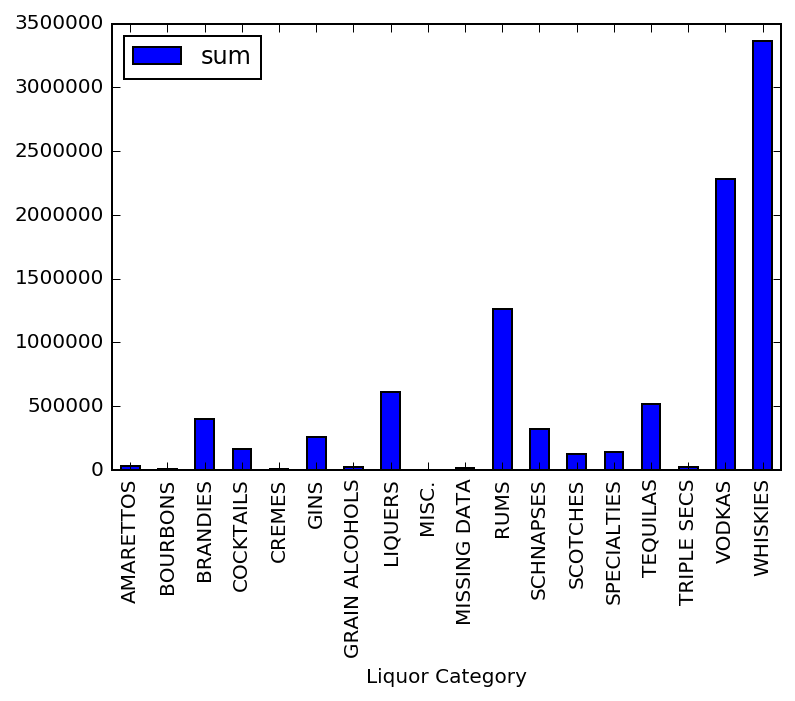

In [68]:
#b5.7 y pivot
iowa_pivliq = pd.pivot_table(iowa_2015, columns=['Liquor Category'], values='Profit',aggfunc=[np.sum],fill_value=np.nan).plot(kind='bar')

In [69]:
#5.7 by groupby

ppg = iowa_longish.groupby('Liquor Category')['Profit'].sum().reset_index()
#print ppg.head(10)
ppg.sort_values('Profit',ascending=False, inplace=True)
print ppg.head(12)
#print "Type: ",type(ppg)

#Note Whiskies, Vodkats and Rums dominate

   Liquor Category        Profit
17        WHISKIES  4.139254e+06
16          VODKAS  2.794845e+06
10            RUMS  1.525286e+06
7          LIQUERS  7.384243e+05
14        TEQUILAS  6.295598e+05
2         BRANDIES  4.877834e+05
11       SCHNAPSES  4.045835e+05
5             GINS  3.065027e+05
3        COCKTAILS  1.922263e+05
13     SPECIALTIES  1.624291e+05
12        SCOTCHES  1.464116e+05
9     MISSING DATA  4.138084e+04


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

In [75]:
# let's group this and see the totals, use category name as brand. pic would help
iowa_brand_sales = iowa.groupby('Category Name')['Sale (Dollars)','Profit'].sum()
iowa_brand_sales.sort_values('Profit',ascending=False, inplace=True)
print iowa_brand_sales

                                    Sale (Dollars)      Profit
Category Name                                                 
CANADIAN WHISKIES                       4408768.86  1486013.93
VODKA 80 PROOF                          4208811.41  1407589.21
SPICED RUM                              2727704.47   909686.97
IMPORTED VODKA                          2079010.43   693318.82
STRAIGHT BOURBON WHISKIES               1923907.85   643877.72
TEQUILA                                 1886724.18   629559.83
WHISKEY LIQUEUR                         1797053.44   599345.50
TENNESSEE WHISKIES                      1598605.37   532966.24
PUERTO RICO & VIRGIN ISLANDS RUM        1046370.81   349717.80
VODKA FLAVORED                          1020099.57   341881.63
BLENDED WHISKIES                         978413.11   326396.94
MISC. IMPORTED CORDIALS & LIQUEURS       941341.80   314190.56
CREAM LIQUEURS                           807711.58   269724.68
IMPORTED GRAPE BRANDIES                  802629.55   26

In [ ]:
#Whiskies and Vodka's dominate

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [71]:
#Compare 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [84]:

#Separate data by year, narrow to quarter and merge data.  Calc Growth rate and sort
iowa_2015q = iowa_longish[(iowa_longish['Year']==2015)&(iowa_longish['Quarter']==1)]
iowa_2016q = iowa_longish[(iowa_longish['Year']==2016)&(iowa_longish['Quarter']==1)]

i2015 =  iowa_2015q.groupby(['Store Number'])['Sale (Dollars)'].apply(np.sum).reset_index()
i2015.rename(columns={'Sale (Dollars)': '2015 Store Sales'}, inplace=True)
i2016 =  iowa_2016q.groupby(['Store Number'])['Sale (Dollars)'].apply(np.sum).reset_index()
i2016.rename(columns={'Sale (Dollars)': '2016 Store Sales'}, inplace=True)
Sales_Comp=pd.merge(i2015, i2016, on='Store Number', how='inner')
Sales_Comp['Sales Growth Rate']= (Sales_Comp['2016 Store Sales']/Sales_Comp['2015 Store Sales']-1)
Sales_Comp.sort_values('Sales Growth Rate',ascending=False, inplace=True)

Sales_Comp.head()



,Store Number,2015 Store Sales,2016 Store Sales,Sales Growth Rate
1101,5021,11.21,944.98,83.297948
607,4401,47.72,931.17,18.513202
1168,5103,42.76,733.19,16.146632
1179,5128,477.00,7052.07,13.784214
1007,4896,60.12,883.47,13.695110


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [87]:
Sales_Comp['Potential Index'] = (Sales_Comp['2016 Store Sales']* Sales_Comp['Sales Growth Rate']/100.0) * 4
Sales_Comp.sort_values('Potential Index',ascending=False, inplace=True)
Sales_Comp

,Store Number,2015 Store Sales,2016 Store Sales,Sales Growth Rate,Potential Index
480,4191,787.90,10534.19,12.369958,5212.299564
190,3477,16112.64,53213.22,2.302576,4901.099573
1179,5128,477.00,7052.07,13.784214,3888.289635
282,3772,1055.58,10185.88,8.649558,3524.134226
1101,5021,11.21,944.98,83.297948,3148.595806
1170,5105,2708.56,14971.97,4.527649,2711.513226
415,4092,3797.62,16880.58,3.445042,2326.172212
456,4159,1635.71,10578.24,5.467063,2313.276279
91,2595,10176.63,29151.01,1.864505,2174.088440
177,3354,29695.26,55227.36,0.859804,1899.387954


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [ ]:
#Recommendation  Further review top 5 stores.  Make sure Growth Rates are not skewed by partial quarter activity.   

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [ ]:
# did not get to this

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


In [ ]:
#1a  Liquore sales spike during football season / Holidays (Q4) 
#1b  Tequila consumption per capita is greatest in the heavily populated coun ties
#1c  Flavored liqueur compsumption is inelastic

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?